<div id="haut_page" style="border:3px solid black; padding:3%; font-size:314% ; text-align:center; background-color:#0000FF;">
    TP3 ATDN2
</div>

<h1>AHMED IGHILAHRIZ /  Groupe2-3 </h1>
<p>
  <br>
     <br>
    <details open>
        <summary><strong style="font-size:1.414em;color:green;">Menu de navigation</strong></summary>
        <ul>
            <li><a href="#exo1">Partie 1 : Exoercice 4</a></li>
            <li><a href="#exo2">Partie 1 : Exoercice 5</a></li>
            <li><a href="#exo3">Partie 1 : Exoercice 6</a></li>
            <li><a href="#exo4">Partie 2 : Exoercice 11 </a></li>
            <li><a href="#exo5"> Partie 2 : Exoercice 12</a></li>
             <li><a href="#exo6"> Partie 2 : Exoercice 13</a></li>
              <li><a href="#exo7"> Partie 2 : Exoercice 14</a></li>




           
</p>

<div id="exo1" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 4
</div>
<p>
    
</p>

In [40]:
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Chargement du fichier CSV 
df = pd.read_csv(r"C:\Users\pc\Downloads/tp2_atdn_donnees.csv")

# Préparation des données : variables d'entrée et cible
X = df[["Humidité (%)", "Température (°C)"]].values
y = df["Rendement agricole (t/ha)"].values

# Fonction de prédiction : interpolation pour approximer le rendement
def rendement_modele(humidite, temperature):
    point = np.array([[humidite, temperature]])
    result = griddata(X, y, point, method='linear', fill_value=np.mean(y))
    if np.isscalar(result):
        return float(result)  # Si c'est déjà une valeur scalaire
    elif result.size == 1:
        return float(result[0])  # Extraire une valeur unique si possible
    else:
        raise ValueError("Le résultat n'est pas une valeur scalaire unique.")


# Définition des bornes de recherche
pbounds = {
    "humidite": (df["Humidité (%)"].min(), df["Humidité (%)"].max()),
    "temperature": (df["Température (°C)"].min(), df["Température (°C)"].max())
}

# Lancement de l'optimisation bayésienne
optimizer = BayesianOptimization(
    f=rendement_modele,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | humidite  | temper... |
-------------------------------------------------
| 1         | 7.182     | 52.5      | 33.77     |
| 2         | 7.496     | 73.69     | 25.01     |
| 3         | 4.833     | 39.55     | 14.0      |
| 4         | 6.798     | 33.75     | 31.66     |
| 5         | 6.407     | 65.93     | 27.73     |
| 6         | 7.037     | 52.47     | 33.61     |
| 7         | 7.644     | 53.85     | 34.61     |
| 8         | 6.869     | 75.37     | 23.08     |
| 9         | 7.705     | 74.28     | 27.33     |
| 10        | 7.733     | 71.9      | 27.08     |
| 11        | 7.724     | 73.07     | 29.89     |
| 12        | 8.312     | 76.39     | 30.38     |
| 13        | 8.296     | 76.2      | 33.04     |
| 14        | 7.935     | 79.2      | 31.82     |
| 15        | 6.759     | 73.19     | 34.83     |
| 16        | 6.759     | 78.36     | 34.8      |
| 17        | 8.115     | 78.78     | 28.68     |
| 18        | 8.77      | 81.99     | 29.36     |


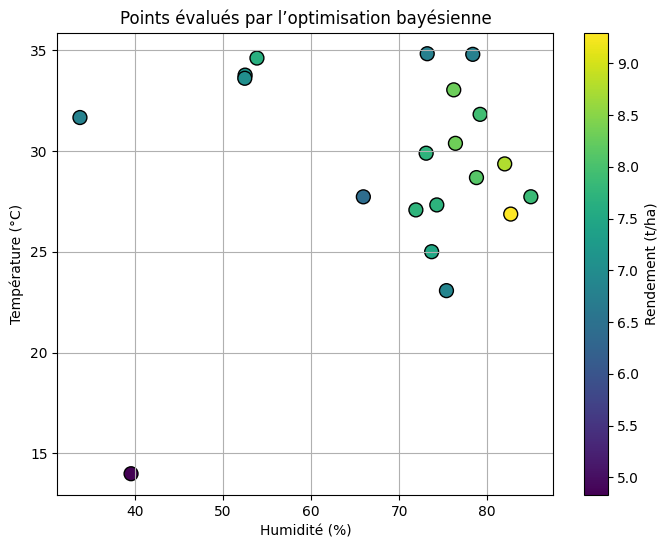

In [41]:

# Visualisation des points testés par la BO
x_vals = [res["params"]["humidite"] for res in optimizer.res]
y_vals = [res["params"]["temperature"] for res in optimizer.res]
z_vals = [res["target"] for res in optimizer.res]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100, edgecolors='k')
plt.xlabel("Humidité (%)")
plt.ylabel("Température (°C)")
plt.title("Points évalués par l’optimisation bayésienne")
plt.colorbar(scatter, label="Rendement (t/ha)")
plt.grid(True)
plt.show()

<div id="exo2" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 5
</div>
<p>
    
</p>

In [43]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Séparer les données en ensembles d'entraînement et de test
X = df[["Humidité (%)", "Température (°C)", "pH du sol", "Précipitations (mm)"]]
y = df["Rendement agricole (t/ha)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle
rf = RandomForestRegressor(random_state=42)

# Définir les espaces de recherche
search_space = {
    "n_estimators": (10, 200),  # entre 10 et 200 arbres
    "max_depth": (3, 20),       # profondeur entre 3 et 20
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 10)
}

# Optimisation bayésienne
opt = BayesSearchCV(estimator=rf, search_spaces=search_space, cv=3, n_iter=50, random_state=42)
opt.fit(X_train, y_train)

print("Meilleurs paramètres :", opt.best_params_)
print("Performance sur test :", opt.score(X_test, y_test))


Meilleurs paramètres : OrderedDict({'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 169})
Performance sur test : 0.7412724717408035


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres Grid Search :", grid_search.best_params_)
print("Performance sur test Grid Search :", grid_search.score(X_test, y_test))


Meilleurs paramètres Grid Search : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Performance sur test Grid Search : 0.7388599333896144


In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, random_state=42)
random_search.fit(X_train, y_train)
print("Meilleurs paramètres Random Search :", random_search.best_params_)
print("Performance sur test Random Search :", random_search.score(X_test, y_test))


Meilleurs paramètres Random Search : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Performance sur test Random Search : 0.7393502959995049


<div id="exo3" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 6
</div>
<p>
    
</p>

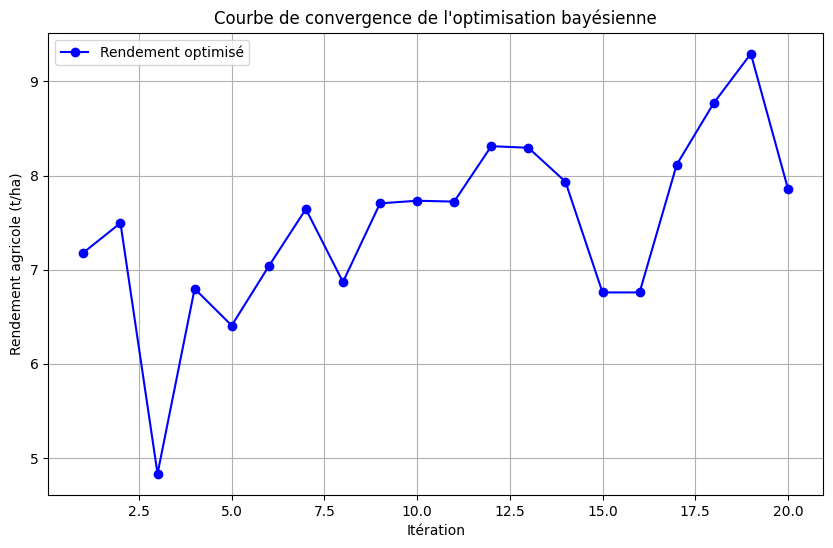

In [48]:
import matplotlib.pyplot as plt

# Extraire les itérations et les rendements
iterations = list(range(1, len(optimizer.res) + 1))
rendements = [res['target'] for res in optimizer.res]

# Tracer la courbe de convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, rendements, marker='o', linestyle='-', color='b', label='Rendement optimisé')
plt.xlabel("Itération")
plt.ylabel("Rendement agricole (t/ha)")
plt.title("Courbe de convergence de l'optimisation bayésienne")
plt.legend()
plt.grid()
plt.show()


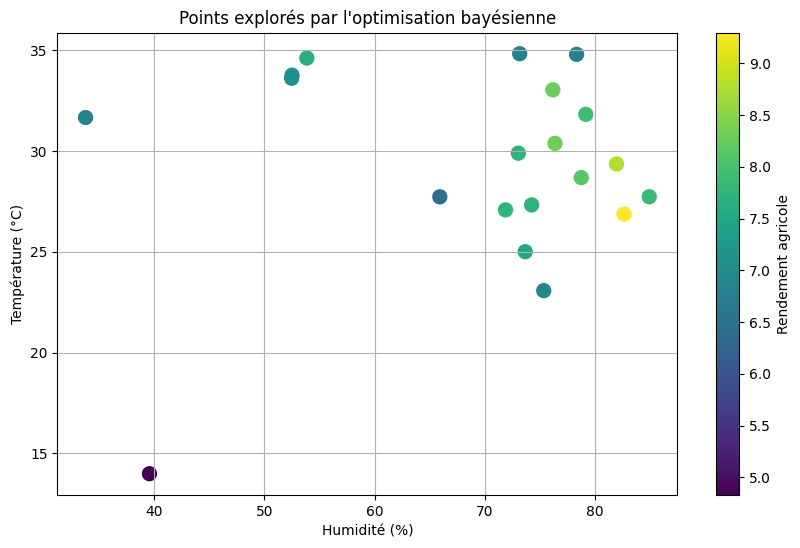

In [49]:
# Extraire les points explorés
humidite_values = [res['params']['humidite'] for res in optimizer.res]
temperature_values = [res['params']['temperature'] for res in optimizer.res]
rendement_values = [res['target'] for res in optimizer.res]

# Tracer les points explorés
plt.figure(figsize=(10, 6))
sc = plt.scatter(humidite_values, temperature_values, c=rendement_values, cmap='viridis', s=100)
plt.colorbar(sc, label="Rendement agricole")
plt.xlabel("Humidité (%)")
plt.ylabel("Température (°C)")
plt.title("Points explorés par l'optimisation bayésienne")
plt.grid()
plt.show()


<div id="exo4" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 11
</div>
<p>
    
</p>

In [26]:
#impoter les bib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data_path = r"C:\Users\pc\Downloads/tp2_atdn_donnees.csv"
data = pd.read_csv(data_path)

X = data[['Humidité (%)', 'Température (°C)']].values  # Deux variables explicatives
y = data['Rendement agricole (t/ha)'].values  # Variable cible

# Normalisation des données
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Définition du noyau (RBF pour les deux features)
kernel = ConstantKernel(1.0) * RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=0.1)

# Création et entraînement du modèle
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# Affichage des paramètres optimisés
print("Noyau optimisé :", gp.kernel_)



Noyau optimisé : 2.86**2 * RBF(length_scale=[7.33, 7.82]) + WhiteKernel(noise_level=0.41)


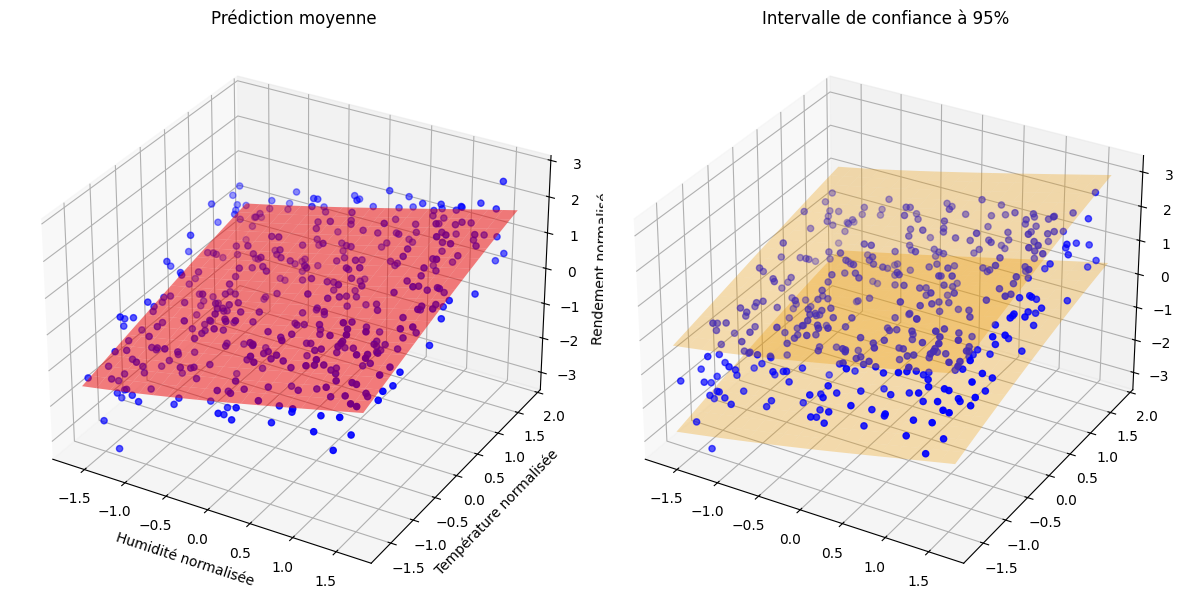

In [27]:
# Prédiction sur une grille pour la visualisation (pour 2D)
x1 = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), 20)
x2 = np.linspace(X_scaled[:,1].min(), X_scaled[:,1].max(), 20)
X1, X2 = np.meshgrid(x1, x2)
X_pred = np.vstack((X1.ravel(), X2.ravel())).T

y_pred, sigma = gp.predict(X_pred, return_std=True)

# Visualisation 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='blue', label='Données train')
ax.plot_surface(X1, X2, y_pred.reshape(X1.shape), color='red', alpha=0.5, label='Surface de prédiction')
ax.set_xlabel('Humidité normalisée')
ax.set_ylabel('Température normalisée')
ax.set_zlabel('Rendement normalisé')
ax.set_title('Prédiction moyenne')

# Visualisation de l'incertitude
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_train[:,0], X_train[:,1], y_train, c='blue')
ax2.plot_surface(X1, X2, (y_pred + 1.96*sigma).reshape(X1.shape), color='orange', alpha=0.3)
ax2.plot_surface(X1, X2, (y_pred - 1.96*sigma).reshape(X1.shape), color='orange', alpha=0.3)
ax2.set_title('Intervalle de confiance à 95%')
plt.tight_layout()
plt.show()

<div id="exo5" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 12
</div>
<p>
    
</p>

In [35]:
# Importations des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC  # Pour comparaison avec SVM classique
from sklearn.exceptions import ConvergenceWarning
import warnings

# Désactiver les warnings de convergence (optionnel)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Chargement des données
data = pd.read_csv(r"C:\Users\pc\Downloads\tp2_atdn_donnees.csv")

# Sélection des features (humidité, température, pH) et de la target (type de sol)
X = data[['Humidité (%)', 'Température (°C)', 'pH du sol']].values
y = data['Type de sol'].values

# Encodage des labels (argileux -> 0, limoneux -> 1, sableux -> 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Définition du noyau RBF avec des bornes élargies pour length_scale
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e6))

# Modèle Bayésien à noyau
gpc = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10)
gpc.fit(X_train, y_train)

# Prédictions
y_pred_gpc = gpc.predict(X_test)
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)



# Affichage des résultats
print(f"Accuracy Gaussian Process Classifier: {accuracy_gpc:.3f}")
print(f"Accuracy SVM: {accuracy_svm:.3f}")




Accuracy Gaussian Process Classifier: 0.310
Accuracy SVM: 0.370


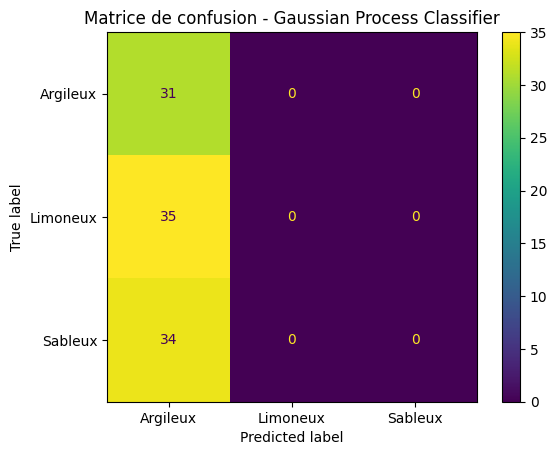

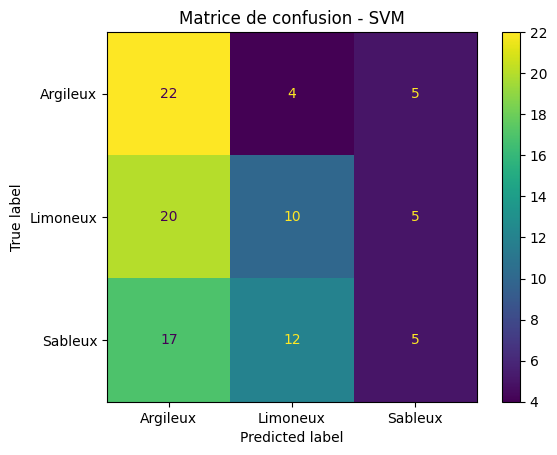

In [36]:
# Afficher la matrice de confusion pour le modèle bayésien
conf_matrix_gpc = confusion_matrix(y_test, y_pred_gpc)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gpc, display_labels=le.classes_)
disp.plot()
plt.title("Matrice de confusion - Gaussian Process Classifier")
plt.show()

# Comparaison avec SVM classique
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Afficher la matrice de confusion pour SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=le.classes_)
disp_svm.plot()
plt.title("Matrice de confusion - SVM")
plt.show()

<div id="exo6" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 13
</div>
<p>
    
</p>

In [47]:
# IMPORTATIONS OBLIGATOIRES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.preprocessing import StandardScaler

# 1. CHARGEMENT DES DONNÉES (remplacez par votre chemin)
data = pd.read_csv(r"C:\Users\pc\Downloads\tp2_atdn_donnees.csv")
X = data[['Humidité (%)']].values
y = data['Rendement agricole (t/ha)'].values

# 2. PRÉTRAITEMENT
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. ENTRAÎNEMENT DU MODÈLE (à exécuter une seule fois)
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X_scaled, y)  # Entraînement sur toutes les données



GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

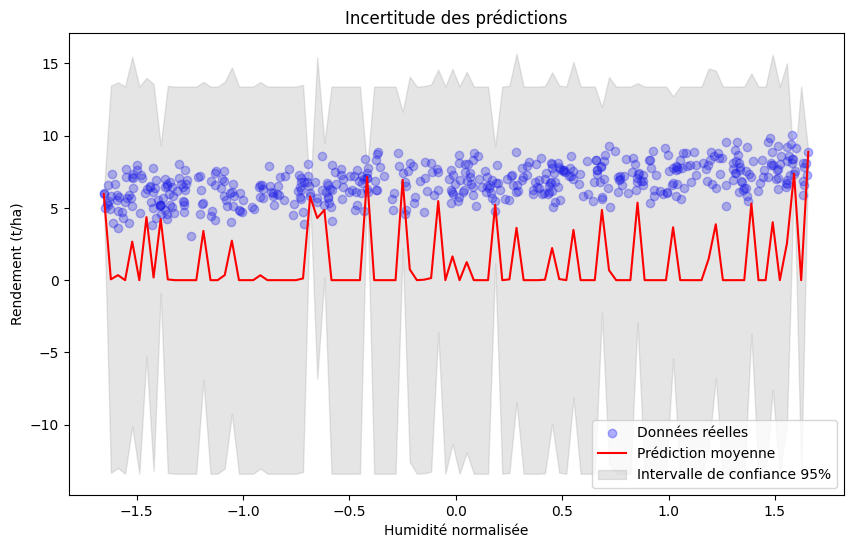

In [50]:
# 4. PRÉDICTION ET VISUALISATION
X_test = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_test, return_std=True)

plt.figure(figsize=(10,6))
plt.scatter(X_scaled, y, c='blue', alpha=0.3, label='Données réelles')
plt.plot(X_test, y_pred, 'r-', label='Prédiction moyenne')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96*sigma, 
                 y_pred + 1.96*sigma,
                 alpha=0.2, color='gray', label='Intervalle de confiance 95%')
plt.xlabel('Humidité normalisée')
plt.ylabel('Rendement (t/ha)')
plt.legend()
plt.title('Incertitude des prédictions')
plt.show()

<div id="exo7" style="border:3px solid black; padding:1%; font-size:213% ; text-align:center; color:white; background-color:black;">
   Exercice 14
</div>
<p>
    
</p>

RBF: R² = -33.803
Linéaire: R² = 0.372
Polynomial: R² = 0.371


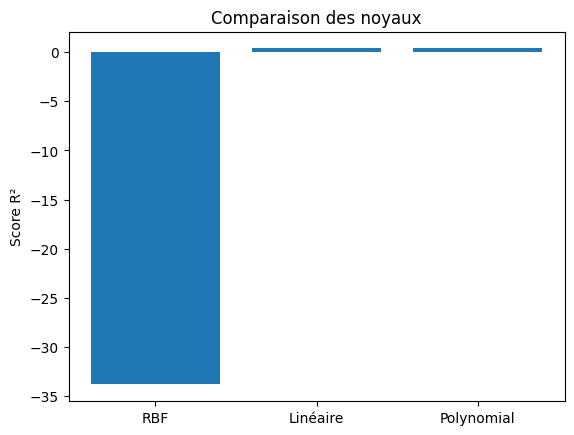

In [56]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, Exponentiation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. CHARGEMENT DES DONNÉES
data = pd.read_csv(r"C:\Users\pc\Downloads\tp2_atdn_donnees.csv")
X = data[['Humidité (%)', 'Température (°C)']].values
y = data['Rendement agricole (t/ha)'].values

# 2. PRÉTRAITEMENT
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. COMPARAISON DES NOYAUX
kernels = {
    "RBF": 1.0 * RBF(length_scale=1.0),
    "Linéaire": DotProduct(sigma_0=1.0),
    "Polynomial": Exponentiation(DotProduct(), exponent=3)
}

results = {}
for name, kernel in kernels.items():
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)
    score = gp.score(X_test, y_test)
    results[name] = score
    print(f"{name}: R² = {score:.3f}")

# 4. VISUALISATION
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values())
plt.ylabel('Score R²')
plt.title('Comparaison des noyaux')
plt.show()